## Exploratory Data Analysis of Fifa World Cups
---

<img src="https://accounts.iebschool.com/uploads/profile/48f8fd4ccb38eb54c8c8b45656a8d32ce661054e.png" style="float:rigth" width="150">

*Guillermo Altesor*

November 2021

 ---


# Datasets

In this notebook we are going to work with a dataset obtained from [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup?select=WorldCupMatches.csv):

- WorldCupMatches.csv: Data of the matches played
- WorldCupPlayers.csv: Data of the players who have played in each match
- WorldCups.csv: Data of the disputed cups and the results

In [ ]:
import pandas as pd

Once Pandas is imported, we mount Google Drive and ask it to read the files to be analyzed using the "Copy path" option:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load WorldCupMatches file
df_part = pd.read_csv("/content/drive/WorldCupMatches.csv")

## Data Exploration

In [ ]:
df_part.head(20)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [ ]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [ ]:
df_part.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


## Brief comment
✔
Using the formula **.head()** we can first observe what type of information is displayed in the df. We look at what data the 19 columns (from *Year* to *Away Team Initials*) show us. It stands out that there is no information in the *Win Conditions* column not even using **.head(20)** so we will explore more about it later.

✔
With the formula **.info()** we get more detailed numerical information about the number of rows (4751) the two *dataTypes*, float 64(8 ​​columns) and object (12 columns) and the memory used (414.5+ KB ), plus the number of non-nulls (852 in each column). This gives us a more global view of our data and a better idea of ​​the total compound.

✔
Finally, with **.describe()** we get a statistical description of our columns, but only the 8 that contain float/*float64* numeric data. We obtain maximum, minimum, percentiles of 25, 50 and 75%, in addition to the mean, total count and std (standard deviation of the array). As a curious fact, we can see that the average number of goals at home is 1.81, while for the visitor it is 1.02, as well as that the maximum number of goals scored was 10. It also highlights that we have data from 1930 to 2014, so we do not have data from the last World Cup in 2018.

## Data Cleaning

One of the things that stands out is the high presence of missing values in the DataFrame `df_parties`.

In [ ]:
df_part.isnull()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4568,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4569,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4570,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df_part = df_part.dropna()

In [ ]:
df_part.isnull()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
848,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
849,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
850,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           8

First we run .isnull() and it returns nulls starting at row 852. We then clear the DataFrame and call the info() function again where we can check that 850 rows have been kept.
 
NaN (Not-A-Number) values ​​are not empty cells, but missing information, which is useless. Therefore, if we operate .describe() again, the values ​​should be the same as before.

In [ ]:
df_part.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


Likewise, we see that now the *Attendance* data does correspond in the *count* row.
 
The NaNs have been eliminated in this case for reasons of space, since it is a case in which the NaNs were represented in all the columns and rows starting from row 852. In other cases, they can be substituted to be taken into account. in numerical operations or to provide us with other types of information such as "error in the introduction of this data".

## New data load
 
Just as we loaded the match data into `df_matches`, we created the variables `df_players` and `df_cups`.

In [ ]:
df_jug = pd.read_csv("/content/Drive/WorldCupPlayers.csv")
df_cop = pd.read_csv("/content/Drive/WorldCups.csv")

In [ ]:
df_cop.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
print('Mundial más reciente:', df_cop["Year"].max())

Mundial más reciente: 2014


In [ ]:
print('Mundial más antiguo:', df_cop["Year"].min())

Mundial más antiguo: 1930


In [ ]:
max_year = df_cop["Year"].idxmax()
min_year = df_cop["Year"].idxmin()

df_cop.loc[[min_year,max_year]]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


## Attendance of public
 
The column `Attendance` indicates the attendance of public in each world cup. Pandas has loaded this column as type string, since the indicated values ​​contain periods as thousands separator. First of all we are going to transform this column so that it does not contain the `.`.will later transform this column to numeric format using the [pd.to_numeric](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) function.
 
**Note**: The `pd.read_csv` also allows us to do this much more transparently, by using the `thousands`. See the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). df_cop = pd.read_csv("WorldCups.csv", thousands=".")

In [ ]:
df_cop["Attendance"] = pd.to_numeric(df_cop["Attendance"].str.replace(".", ""))

In [ ]:
print('Highest attendance at a World Cup:',df_cop["Attendance"].max(), 'millions of people')
print('Average attendance at a World Cup:',df_cop["Attendance"].mean(), 'millions of people')

Mayor asistencia a un mundial: 3587538 millones de personas
Media de asistencia a un mundial: 1872882.35 millones de personas


## Audience attendance depending on the country
 
We know that, depending on the country where the world cup is held, it has a greater or lesser impact or relevance . Let's calculate the average attendance by grouping by country. Finally, sort the results in decreasing order of this average number of attendees.

In [ ]:
df_personas = pd.DataFrame(
    [
        ("Juan", "male", 56),
        ("Laura", "female", 23),
        ("José", "male", 46),
        ("Rosa", "female", 26)
    ], columns=["name", "gender", "age"])

# average age of all people
mean_age = df_personas["age"].mean()
# mean age grouped by gender
mean_age_by_gender = df_personas.groupby("gender").mean()[["age"]]

print(f"The average age of the {len(df_personas)} is {mean_age} years.")
print(f"The average age grouped by gender is:")
mean_age_by_gender

La edad media de las 4 es de 37.75 años.
La edad media agrupada por género es:


,age
gender,
female,24.5
male,51.0


In [ ]:
attendance_gb_country = df_cop.groupby("Country").mean()
attendance_gb_country_sorted = attendance_gb_country.sort_values("Attendance", ascending=False)
attendance_gb_country_sorted[["Attendance"]]

,Attendance
Country,
USA,3587538.0
South Africa,3178856.0
Korea/Japan,2705197.0
Germany,2612596.0
Brazil,2216028.0
Spain,2109723.0
Mexico,1999003.0
France,1580400.0
England,1563135.0


⚡ The only country where the World Cup has been played twice is Brazil. Therefore, when presenting the table we have decided to include it only with the "Attendance" column, since the rest of the information would lead to confusion. For example, the "Year" column would give us erroneous data / that does not work for us on this occasion.


## Country with most wins
 
Let's analyze the number of times a country has won the world cup. Transform the `df_cups` DataFrame to show the different countries that have won at least one world cup, and sort the DataFrame by that number in descending order using the function [sort_values​​](https://pandas.pydata.org/pandas -docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [ ]:
df_cop.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [ ]:
winners_cop = df_cop.groupby("Winner").count()[["Country"]]
winners_cop.rename(columns={'Country':'World Cups won'}, inplace=True)
winners_cop.sort_values("World Cups won", ascending=False)

,Mundiales ganados
Winner,
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2
England,1
France,1
Germany,1
Spain,1


⚡ The "strange" thing is that Germany appears twice: as a Federal Republic and without being a Federal Republic, a strictly political question that is beside the point, so we will transform Germany FR to simply Germany.

In [ ]:
df_cop_GermanyFR_fixed = df_cop.apply(
    lambda x:x.replace(
        'Germany FR', 'Germany'))
winners_cop = df_cop_GermanyFR_fixed.groupby("Winner").count()[["Country"]]
winners_cop.rename(columns={'Country':'Number of times'}, inplace=True)
winners_cop.sort_values("Number of times", ascending=False)

,Number of times
Winner,
Brazil,5
Germany,4
Italy,4
Argentina,2
Uruguay,2
England,1
France,1
Spain,1


## Creating a new DataFrame
 
Next we are going to work with the DataFrame `df_parties`. We are going to focus on information at the national team level, regardless of whether the team plays at home or away. In this sense, the available information is not the best to work comfortably. Therefore, we will create a new DataFrame called `df_countries`that will contain all the countries involved in the world cup and the year in which they participated. That is, a country that has played several world cups will appear several times:
 
 
||Year|Country|
|---|---|---|
|0|1930|France|
|1|1930|USA|
|...|...|..|
|37|1938|France|
|...|...|..|

**Note:** This problem can be tackled in at least two different ways

1. Generating two dataframes, one where the `Country` column corresponds to `Home Team Name`, and one where the `Country` column corresponds to `Away Team Name`. Finally, combine both DataFrames into one.

2. Use the function [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) which allows us to convert N columns into a pair of columns named `variable` and `value` , where the first is the name of one of the columns and `value` is the value that the variable took.


In [ ]:
#alternative 1
df_paises1 = (
    pd.concat([
        df_part[["Year", "Home Team Name"]].rename(columns={"Home Team Name": "Country"}),
        df_part[["Year", "Away Team Name"]].rename(columns={"Away Team Name": "Country"})
    ])
)
#alternative 2
df_paises2 = (
    df_part
    .melt(id_vars=["Year"], value_vars=["Home Team Name", "Away Team Name"])
    .rename(columns={"value": "Country"})
    [["Year", "Country"]]
)

In [ ]:
df_paises2 #Both alternatives return the same result.

,Year,Country
0,1930.0,France
1,1930.0,USA
2,1930.0,Yugoslavia
3,1930.0,Romania
4,1930.0,Argentina
...,...,...
1695,2014.0,Costa Rica
1696,2014.0,Germany
1697,2014.0,Argentina
1698,2014.0,Netherlands


## Number of countries

Let's find out how many countries have participated, at least once, in a world cup.

In [ ]:
print('There have participated', df_paises1['Country'].nunique(), 'countries at least once')

Han participado 83 países al menos una vez


## Number of matches per country

Now let's find out how many matches each country has played.

In [ ]:
df_paises1_ok=  df_paises1.apply(
    lambda x:x.replace(
        'Germany FR', 'Germany'))
df_paises1_ok.rename(columns={'Year':'Games'}, inplace=True)
df_paises_games = df_paises1_ok.groupby("Country").count().sort_values('Games', ascending=False)
df_paises_games

,Games
Country,
Brazil,108
Germany,108
Italy,83
Argentina,81
England,62
...,...
Kuwait,3
Iraq,3
Serbia,3


## Games played by Spain

In [ ]:
spain_is_hometeam = df_part.loc[:, 'Home Team Name'] == 'Spain'
spain_hometeam = df_part[spain_is_hometeam]
spain_hometeam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 23 to 790
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  30 non-null     float64
 1   Datetime              30 non-null     object 
 2   Stage                 30 non-null     object 
 3   Stadium               30 non-null     object 
 4   City                  30 non-null     object 
 5   Home Team Name        30 non-null     object 
 6   Home Team Goals       30 non-null     float64
 7   Away Team Goals       30 non-null     float64
 8   Away Team Name        30 non-null     object 
 9   Win conditions        30 non-null     object 
 10  Attendance            30 non-null     float64
 11  Half-time Home Goals  30 non-null     float64
 12  Half-time Away Goals  30 non-null     float64
 13  Referee               30 non-null     object 
 14  Assistant 1           30 non-null     object 
 15  Assistant 2           3

In [ ]:
spain_is_awayteam = df_part.loc[:, 'Away Team Name'] == 'Spain' 
spain_awayteam = df_part[spain_is_awayteam]
spain_awayteam.head

<bound method NDFrame.head of        Year              Datetime  ... Home Team Initials Away Team Initials
28   1934.0  31 May 1934 - 16:30   ...                ITA                ESP
30   1934.0  01 Jun 1934 - 16:30   ...                ITA                ESP
69   1950.0  09 Jul 1950 - 15:00   ...                URU                ESP
71   1950.0  13 Jul 1950 - 15:00   ...                BRA                ESP
73   1950.0  16 Jul 1950 - 15:00   ...                SWE                ESP
141  1962.0  31 May 1962 - 15:00   ...                TCH                ESP
153  1962.0  06 Jun 1962 - 15:00   ...                BRA                ESP
174  1966.0  13 Jul 1966 - 19:30   ...                ARG                ESP
190  1966.0  20 Jul 1966 - 19:30   ...                FRG                ESP
275  1978.0  03 Jun 1978 - 13:45   ...                AUT                ESP
282  1978.0  07 Jun 1978 - 13:45   ...                BRA                ESP
343  1982.0  25 Jun 1982 - 21:00   ...        

In [ ]:
part_españa = pd.concat([spain_awayteam,spain_hometeam])
part_españa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 28 to 790
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  59 non-null     float64
 1   Datetime              59 non-null     object 
 2   Stage                 59 non-null     object 
 3   Stadium               59 non-null     object 
 4   City                  59 non-null     object 
 5   Home Team Name        59 non-null     object 
 6   Home Team Goals       59 non-null     float64
 7   Away Team Goals       59 non-null     float64
 8   Away Team Name        59 non-null     object 
 9   Win conditions        59 non-null     object 
 10  Attendance            59 non-null     float64
 11  Half-time Home Goals  59 non-null     float64
 12  Half-time Away Goals  59 non-null     float64
 13  Referee               59 non-null     object 
 14  Assistant 1           59 non-null     object 
 15  Assistant 2           5

⚽ We see that Spain has played 59 World Cup matches (until 2014).

Now let's try it with a Disjunction element:

In [ ]:
df_spain = df_part.loc[(df_part['Away Team Name'] == 'Spain') | (df_part['Home Team Name'] == 'Spain')]
df_spain.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
23,1934.0,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3.0,1.0,Brazil,,21000.0,3.0,0.0,BIRLEM Alfred (GER),CARMINATI Ettore (ITA),IVANCSICS Mihaly (HUN),204.0,1111.0,ESP,BRA
28,1934.0,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,1.0,Spain,,35000.0,0.0,0.0,BAERT Louis (BEL),ZENISEK Bohumil (TCH),IVANCSICS Mihaly (HUN),418.0,1122.0,ITA,ESP
30,1934.0,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,0.0,Spain,,43000.0,1.0,0.0,MERCET Rene (SUI),IVANCSICS Mihaly (HUN),ZENISEK Bohumil (TCH),418.0,1123.0,ITA,ESP
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,,9511.0,0.0,1.0,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA
60,1950.0,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2.0,0.0,Chile,,19790.0,2.0,0.0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208.0,1193.0,ESP,CHI


## Calculate the winner of each match
 
The DataFrame `df_parties` has the information of each match, including the goals scored by each team, but we do not have a column that indicates whether a team won or lost. Let's create a column called `Winner` indicating the name of the winning team (with the most goals). We can also find ties, in which case we will use `pd.NA` to indicate that we do not know the winner of that match.

In [ ]:
# alternativa 1
df_part["Winner"] = df_part["Home Team Name"]
df_part.loc[df_part["Home Team Goals"] < df_part["Away Team Goals"], "Winner"] = df_part["Away Team Name"]
df_part.loc[df_part["Home Team Goals"] == df_part["Away Team Goals"], "Winner"] = pd.NA

# alternativa 2
df_part["Winner"] = (
    df_part["Home Team Name"].where(
        df_part["Home Team Goals"] > df_part["Away Team Goals"],
        df_part["Away Team Name"].where(df_part["Home Team Goals"] < df_part["Away Team Goals"], pd.NA)
    )
)

In [ ]:
df_part.loc[:,'Winner']

0           France
1              USA
2       Yugoslavia
3          Romania
4        Argentina
          ...     
847           <NA>
848        Germany
849           <NA>
850    Netherlands
851        Germany
Name: Ganador, Length: 850, dtype: object

## Number of wins per country

In [ ]:
df_part.dropna(subset=['Ganador'], inplace=True)
df_part.isna().any().any()

False

In [ ]:
df_part_ok=  df_part.apply(
    lambda x:x.replace(
        'Germany FR', 'Germany'))
df_part_ganador = df_part_ok.rename(columns={'City':'N_Won'})
df_part_ganador = df_part_ganador.groupby("Ganador").count().sort_values('N_Won', ascending=False)[['N_Won']]
df_part_ganador

,N_Won
Ganador,
Brazil,71
Germany,68
Italy,45
Argentina,44
France,29
...,...
Cuba,1
Korea DPR,1
Wales,1


In [ ]:
df_part.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Ganador'],
      dtype='object')

In [ ]:
df_op1 = pd.merge(df_paises_games, df_part_ganador, left_index=True,right_index=True) # Tener los países en index

df_op1

,Games,N_Won
Brazil,108,71
Germany,108,68
Italy,83,45
Argentina,81,44
England,62,26
...,...,...
"rn"">Bosnia and Herzegovina",3,1
Jamaica,3,1
Cuba,3,1
Czech Republic,3,1


In [ ]:
df_op1['Win_Ratio']= df_op1.loc[:, 'N_Won'] / df_op1.loc[:,'Games']
df_op1.sort_values('Win_Ratio', ascending=False)

,Games,N_Won,Win_Ratio
Brazil,108,71,0.657407
Germany,108,68,0.629630
Argentina,81,44,0.543210
Italy,83,45,0.542169
Netherlands,54,29,0.537037
...,...,...,...
Australia,13,2,0.153846
Morocco,13,2,0.153846
Korea DPR,7,1,0.142857
Bulgaria,26,3,0.115385


⚽ The data shows that for Bulgaria or Tunisia to win a World Cup match is worth celebrating, as they need between 10 and 12 chances to win.
 
⚽ They also show us why if Brazil or Germany lose two games in a row in a World Cup it is a "crisis", because they would be doing worse than all the historical statistics (in addition to the fact that they would be left out of the World Cup almost mathematically because this could only happen in group stage).

 
## Research on "Win Conditions"
 
⚽ We want to know more about the way ties are resolved: For this we are going to create a table with only Win Conditions.

In [ ]:
df_part.groupby("Win conditions").count().sort_values('Year', ascending=False).rename(columns={'Year':'Times'})[['Times']]

,Times
Win conditions,
,627
Italy win after extra time,5
Argentina win after extra time,4
Win on Golden Goal,3
Belgium win after extra time,3
England win after extra time,3
France win after extra time,2
Germany win after extra time,2
Hungary win after extra time,1


⚽ Wow! Very interesting. Italy is the team that has won the most extensions and is followed by Argentina. In addition, 3 matches have been won with the Golden Goal (an old rule).

### Research on 'Germany RF' and Germany''

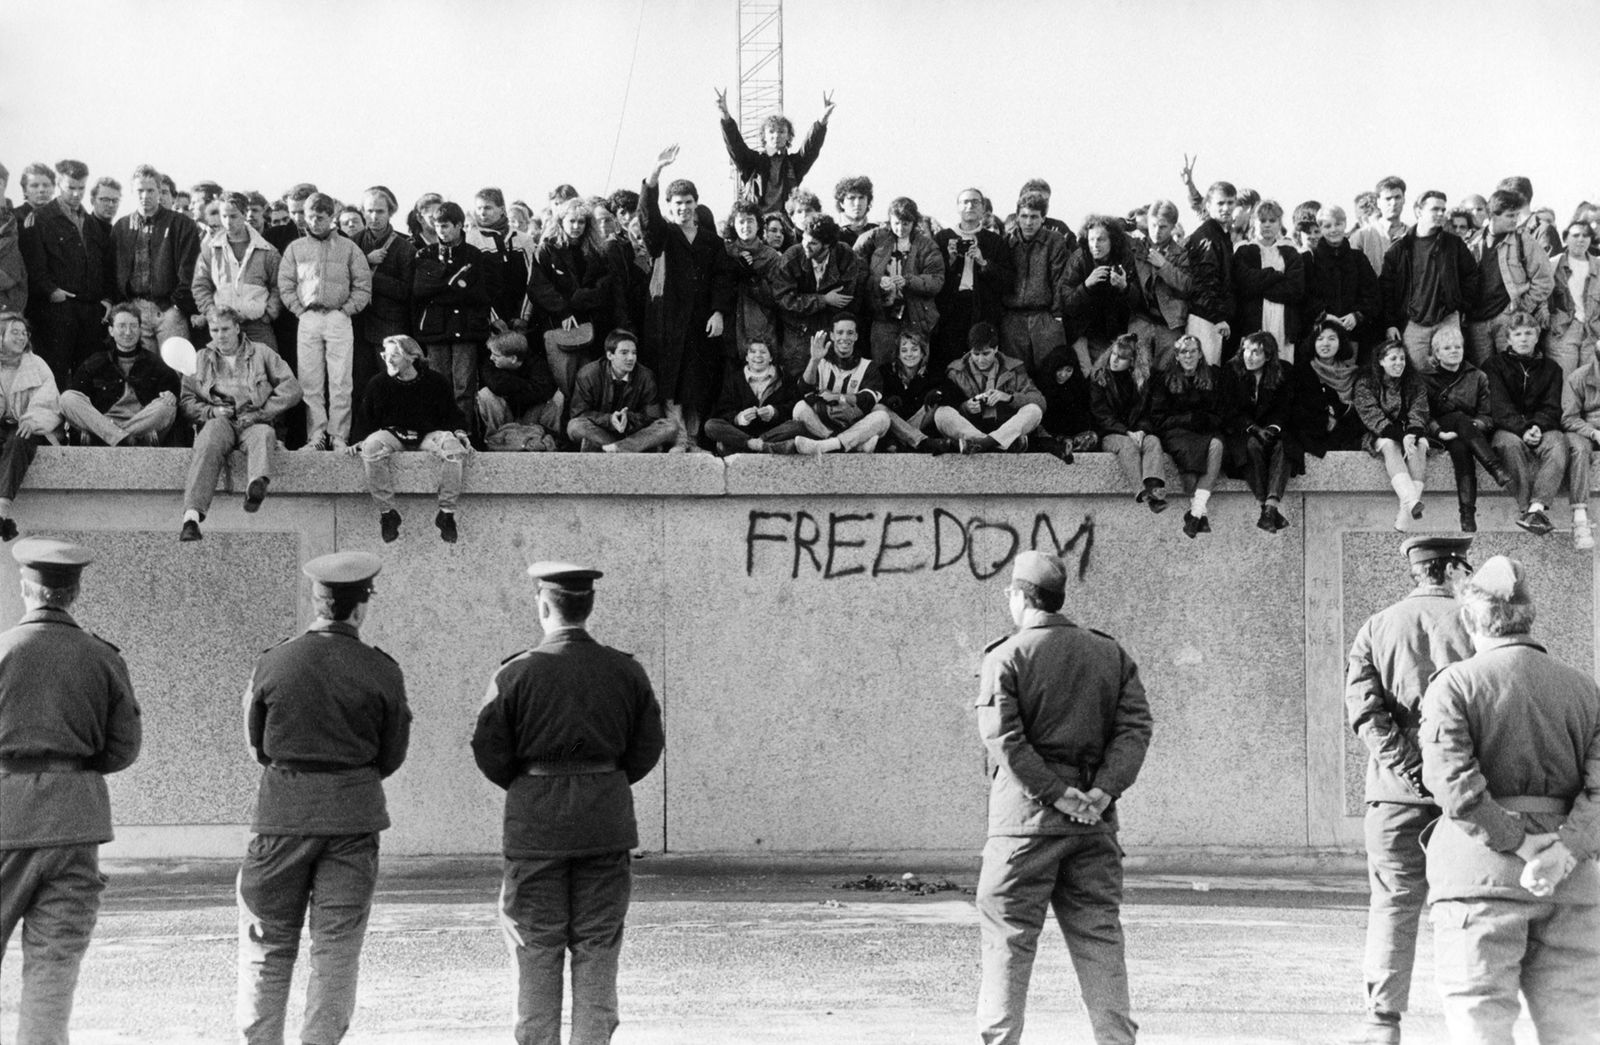
---

⚽ What we want is to verify that the historical data on the division of Federal Germany and Democratic Germany correspond to the data in this DataFrame. We should get data for 'Germany FR' from 1949 to 1990. To do this we use the DataSet df_part.

In [ ]:
df_part.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Ganador
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Yugoslavia
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Romania
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina


In [ ]:
germanyFR_is_hometeam = df_part.loc[:, 'Home Team Name'] == 'Germany FR'
germanyFR_hometeam = df_part[germanyFR_is_hometeam]

germanyFR_is_awayteam = df_part.loc[:, 'Away Team Name'] == 'Germany FR' 
germanyFR_awayteam = df_part[germanyFR_is_awayteam]

part_germanyFR = pd.concat([germanyFR_awayteam,germanyFR_hometeam])
part_germanyFR.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Ganador
87,1954.0,20 Jun 1954 - 16:50,Group 2,St. Jakob,Basel,Hungary,8.0,3.0,Germany FR,,56000.0,3.0,1.0,LING William (ENG),SCHICKER Werner (SUI),GRIFFITHS Benjamin (WAL),211.0,1277.0,HUN,FRG,Hungary
103,1958.0,08 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Argentina,1.0,3.0,Germany FR,,31156.0,1.0,2.0,LEAFE Reginald (ENG),HELGE Leo (DEN),AHLNER Sten (SWE),220.0,1323.0,ARG,FRG,Germany FR
132,1958.0,24 Jun 1958 - 19:00,Semi-finals,Nya Ullevi,Gothenburg,Sweden,3.0,1.0,Germany FR,,49471.0,1.0,1.0,ZSOLT Istvan (HUN),SEIPELT Fritz (AUT),ELLIS Arthur (ENG),488.0,1390.0,SWE,FRG,Sweden
134,1958.0,28 Jun 1958 - 17:00,Match for third place,Nya Ullevi,Gothenburg,France,6.0,3.0,Germany FR,,32483.0,3.0,1.0,BROZZI Juan (ARG),ELLIS Arthur (ENG),LUNDELL Bengt (SWE),3483.0,1382.0,FRA,FRG,France
163,1962.0,10 Jun 1962 - 14:30,Quarter-finals,Nacional,Santiago De Chile,Yugoslavia,1.0,0.0,Germany FR,,63324.0,0.0,0.0,YAMASAKI MALDONADO Arturo (MEX),VENTRE Luis Antonio (ARG),SILVA Jose Antonio (CHI),232.0,1511.0,YUG,FRG,Yugoslavia


⚽ Once we have the Germany FR matches. We are going to make a table where we can see how this team has played matches in World Cups:

In [ ]:
part_germanyFR.groupby("Year").count().sort_values('Year', ascending=False).rename(columns={'Datetime':'part_jug'})[['part_jug']]

,part_jug
Year,
1990.0,5
1986.0,5
1982.0,5
1978.0,2
1974.0,7
1970.0,6
1966.0,5
1962.0,3
1958.0,4


⚽ We are on the right track. We see that the West German national team played matches in Fifa World Cups until 1990. But, matches should appear from 1949, was there a World Cup in 1950? By heart I know that yes, the Maracanazo of Uruguay against Brazil. But let's check it out.

In [ ]:
df_cop.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


⚽ My memory did not fail me. Uruguay won that World Cup in Brazil, against Brazil. So there was a World Cup, but there is no data from Germany FR. Will there be data from Germany?

In [ ]:
germany_is_hometeam = df_part.loc[:, 'Home Team Name'] == 'Germany'
germany_hometeam = df_part[germany_is_hometeam]

germany_is_awayteam = df_part.loc[:, 'Away Team Name'] == 'Germany' 
germany_awayteam = df_part[germany_is_awayteam]

part_germany = pd.concat([germany_awayteam,germany_hometeam])
part_germany[['Year']]

,Year
32,1934.0
43,1938.0
510,1994.0
615,2002.0
676,2006.0
746,2010.0
766,2010.0
770,2010.0
816,2014.0
825,2014.0


⚽ We just need to call .head() to check that there is a jump in the matches from 1938 to 1994 (we also check with [['Year]]) Therefore, no German team played in the World Cup of 1950. By resorting to google we find the following image. Which ends up solving our doubt:

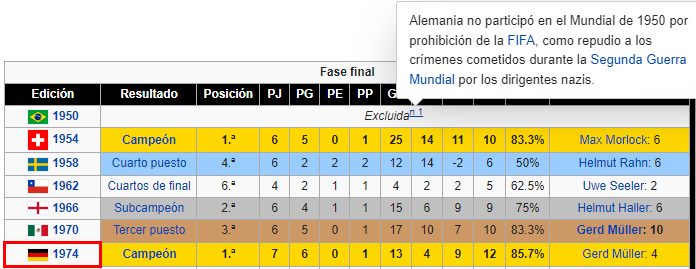

⚽ Another question that arises is about Democratic Germany, according to the data we have seen in [Wikipedia](https://es.wikipedia.org/wiki/Selecci%C3%B3n_de_f%C3% BAtbol_de_Alemania_Democr%C3%A1tica), this team qualified for the 1974 World Cup, where they beat Federal Germany. Let's try to find that emblematic game.

In [ ]:
df_part2 = pd.read_csv("/content/drive//WorldCupMatches.csv")

part_is_1974 = df_part2.loc[:, 'Year'] == 1974.0
part_1974 = df_part2[part_is_1974]
part_1974

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
232,1974.0,13 Jun 1974 - 17:00,Group 2,Waldstadion,Frankfurt/Main,Brazil,0.0,0.0,Yugoslavia,,62000.0,0.0,0.0,SCHEURER Ruedi (SUI),LORAUX Vital (BEL),PESTARINO Luis (ARG),262.0,1986.0,BRA,YUG
233,1974.0,14 Jun 1974 - 16:00,Group 1,Olympiastadion,Berlin West,Germany FR,1.0,0.0,Chile,,81100.0,1.0,0.0,BABACAN Dogan (TUR),TAYLOR John (ENG),WINSEMANN Werner (CAN),262.0,2003.0,FRG,CHI
234,1974.0,14 Jun 1974 - 19:30,Group 1,Volksparkstadion,Hamburg,German DR,2.0,0.0,Australia,,17000.0,0.0,0.0,NDIAYE Youssou (SEN),SANCHEZ IBANEZ Pablo (ESP),DELGADO Omar (COL),262.0,1955.0,GDR,AUS
235,1974.0,14 Jun 1974 - 19:30,Group 2,Westfalenstadion,Dortmund,Zaire,0.0,2.0,Scotland,,27000.0,0.0,2.0,SCHULENBURG Gerhard (GER),BOSKOVIC Tony (AUS),WEYLAND Hans Joachim (FRG),262.0,2176.0,ZAI,SCO
236,1974.0,15 Jun 1974 - 16:00,Group 3,Niedersachsenstadion,Hanover,Uruguay,0.0,2.0,Netherlands,,55100.0,0.0,1.0,PALOTAI Karoly (HUN),KAZAKOV Pavel (URS),RAINEA Nicolae (ROU),262.0,2098.0,URU,NED
237,1974.0,15 Jun 1974 - 16:00,Group 3,Rheinstadion,D�Sseldorf,Sweden,0.0,0.0,Bulgaria,,23800.0,0.0,0.0,PEREZ NUNEZ Edison A. (PER),GONZALEZ ARCHUNDIA Alfonso (MEX),SUPPIAH George (SIN),262.0,1995.0,SWE,BUL
238,1974.0,15 Jun 1974 - 18:00,Group 4,Olympiastadion,Munich,Italy,3.0,1.0,Haiti,,53000.0,0.0,0.0,LLOBREGAT Vicente (VEN),NAMDAR Jafar (IRN),MARQUES Armando (BRA),262.0,2083.0,ITA,HAI
239,1974.0,15 Jun 1974 - 18:00,Group 4,Neckarstadion,Stuttgart,Poland,3.0,2.0,Argentina,,32700.0,2.0,0.0,THOMAS Clive (WAL),ALDINGER Heinz (GER),DAVIDSON Bob (SCO),262.0,1952.0,POL,ARG
240,1974.0,18 Jun 1974 - 16:00,Group 1,Volksparkstadion,Hamburg,Australia,0.0,3.0,Germany FR,,53300.0,0.0,2.0,KAMEL Mahmoud (EGY),GONZALEZ ARCHUNDIA Alfonso (MEX),PEREZ NUNEZ Edison A. (PER),262.0,1954.0,AUS,FRG
241,1974.0,18 Jun 1974 - 19:30,Group 2,Waldstadion,Frankfurt/Main,Scotland,0.0,0.0,Brazil,,62000.0,0.0,0.0,VAN GEMERT Arie (NED),PALOTAI Karoly (HUN),LINEMAYR Erich (AUT),262.0,1985.0,SCO,BRA


In [ ]:
part_is_DRFR = part_1974.loc[:, 'MatchID'] == 2062.0
part_DRFR = part_1974[part_is_DRFR]
part_DRFR

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
251,1974.0,22 June 1974 - 19:30,Group 1,Volksparkstadion,Hamburg,German DR,1.0,0.0,Germany FR,,60200.0,0.0,0.0,BARRETO RUIZ Ramon (URU),MARQUES Armando (BRA),PESTARINO Luis (ARG),262.0,2062.0,GDR,FRG


⚽ On June 22 at 9:30 p.m. Democratic Germany had just won a historic match against Federal Germany. The Democratic selection did not have, in its 51-year history, as much success as the Federal one. In the midst of a Cold War, in the World Cup held in Germany, and in a match played in Hamburg, on the West German side, the Democratic team won 1-0. A fact reminiscent of Maradona's goals against England, only in this case he ended up winning the World Cup in West Germany. More than 60,000 people attended the event.


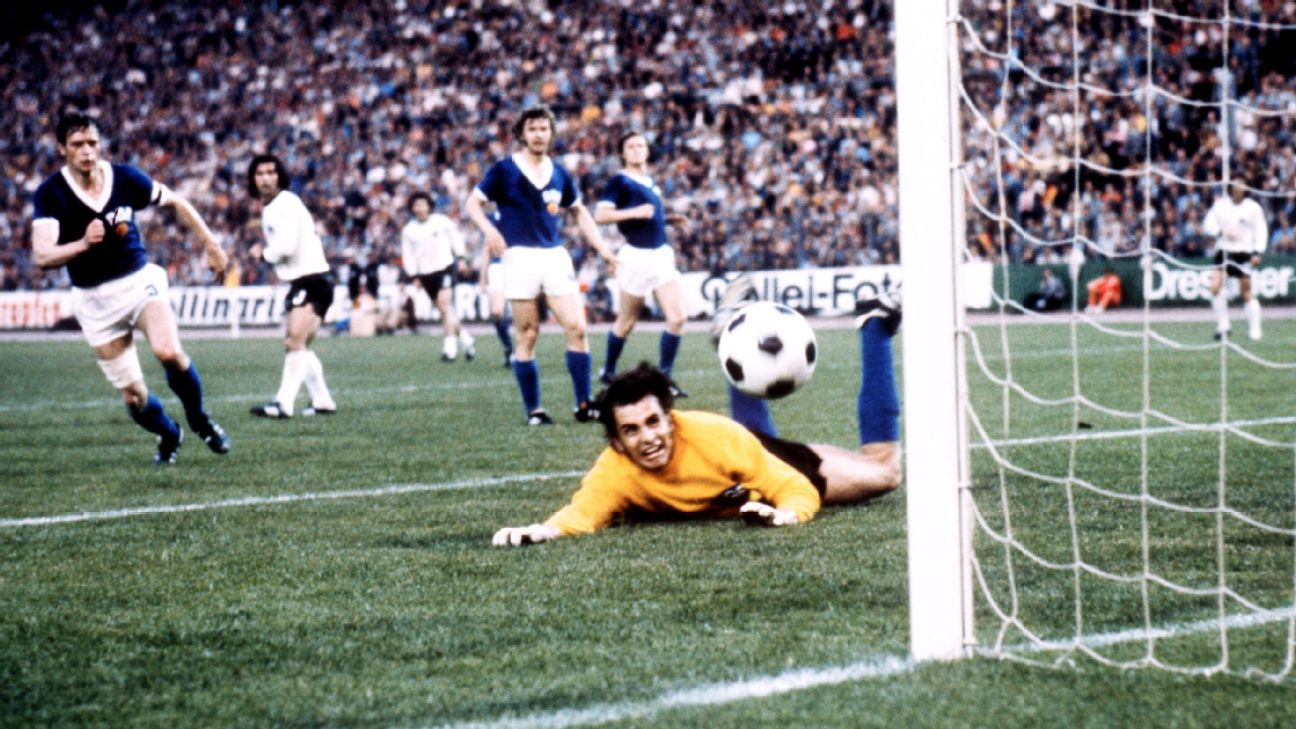

### ℹ 3 Libraries AutoEDA (Exploratory Data Analysis)
Let's explore the autoviz library we've seen on Kaggle:

As this is an exploration, we refrain from commenting on it.

In [ ]:
!pip install autoviz

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.5.1

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? n


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Shape of your Data Set loaded: (4572, 20)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 36


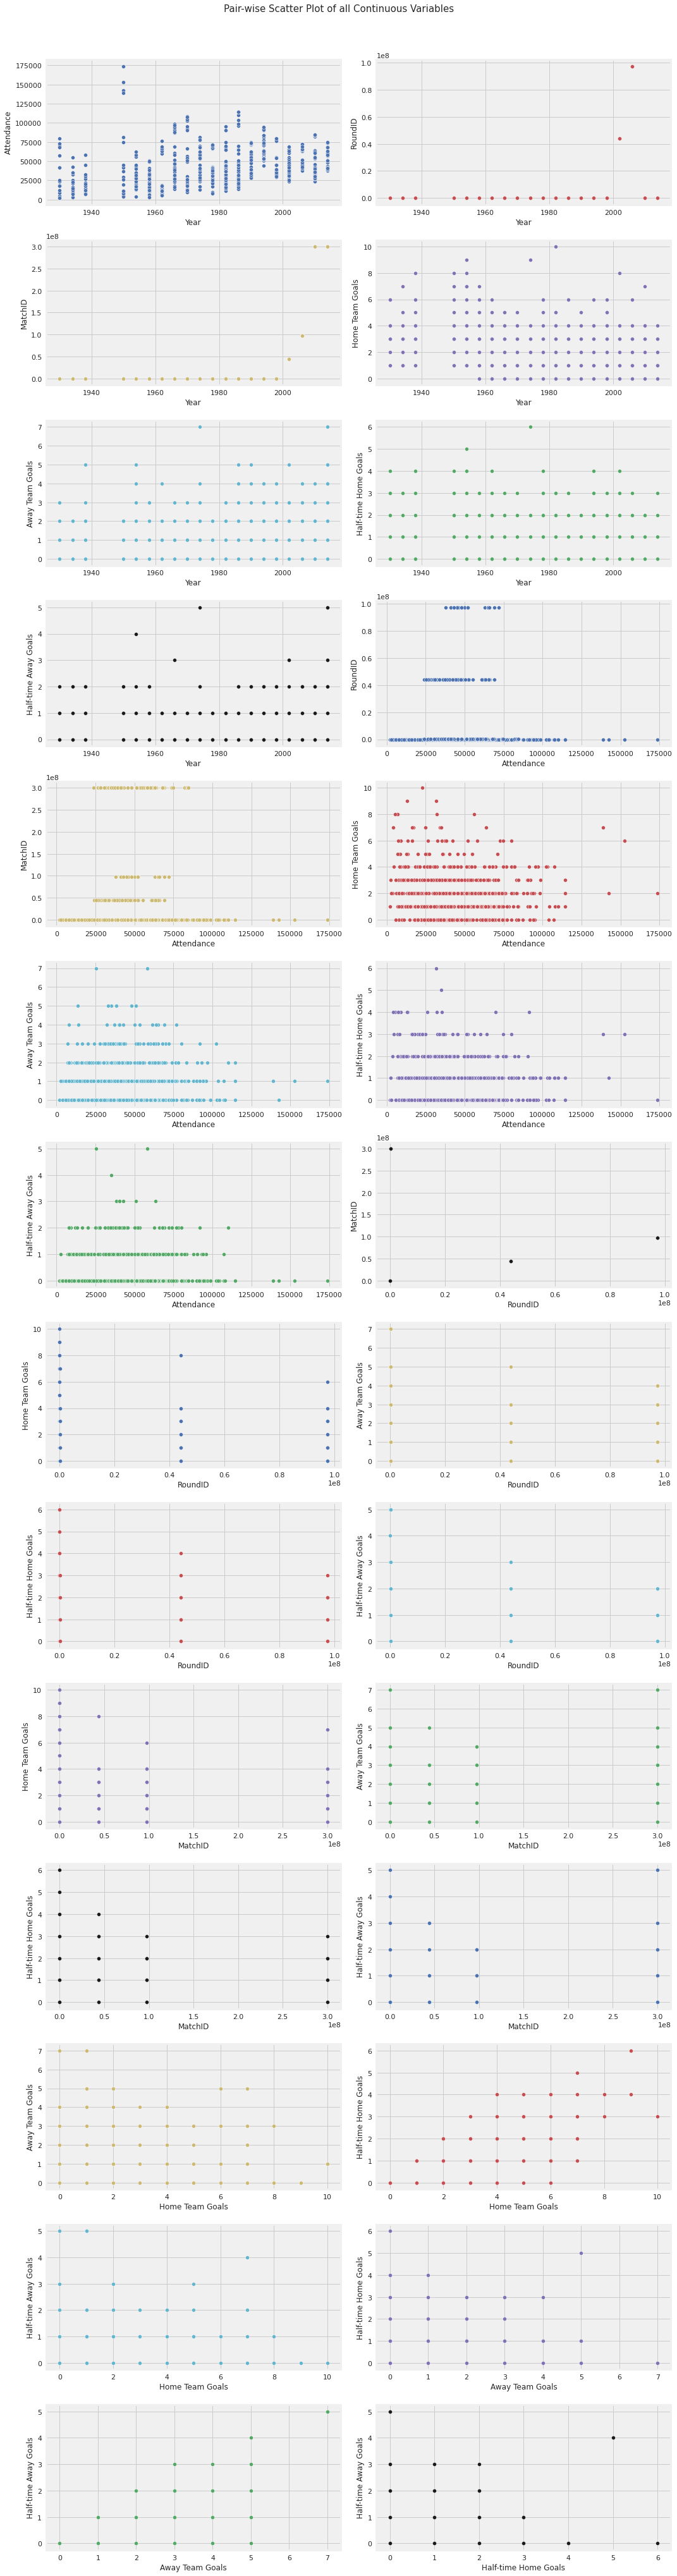

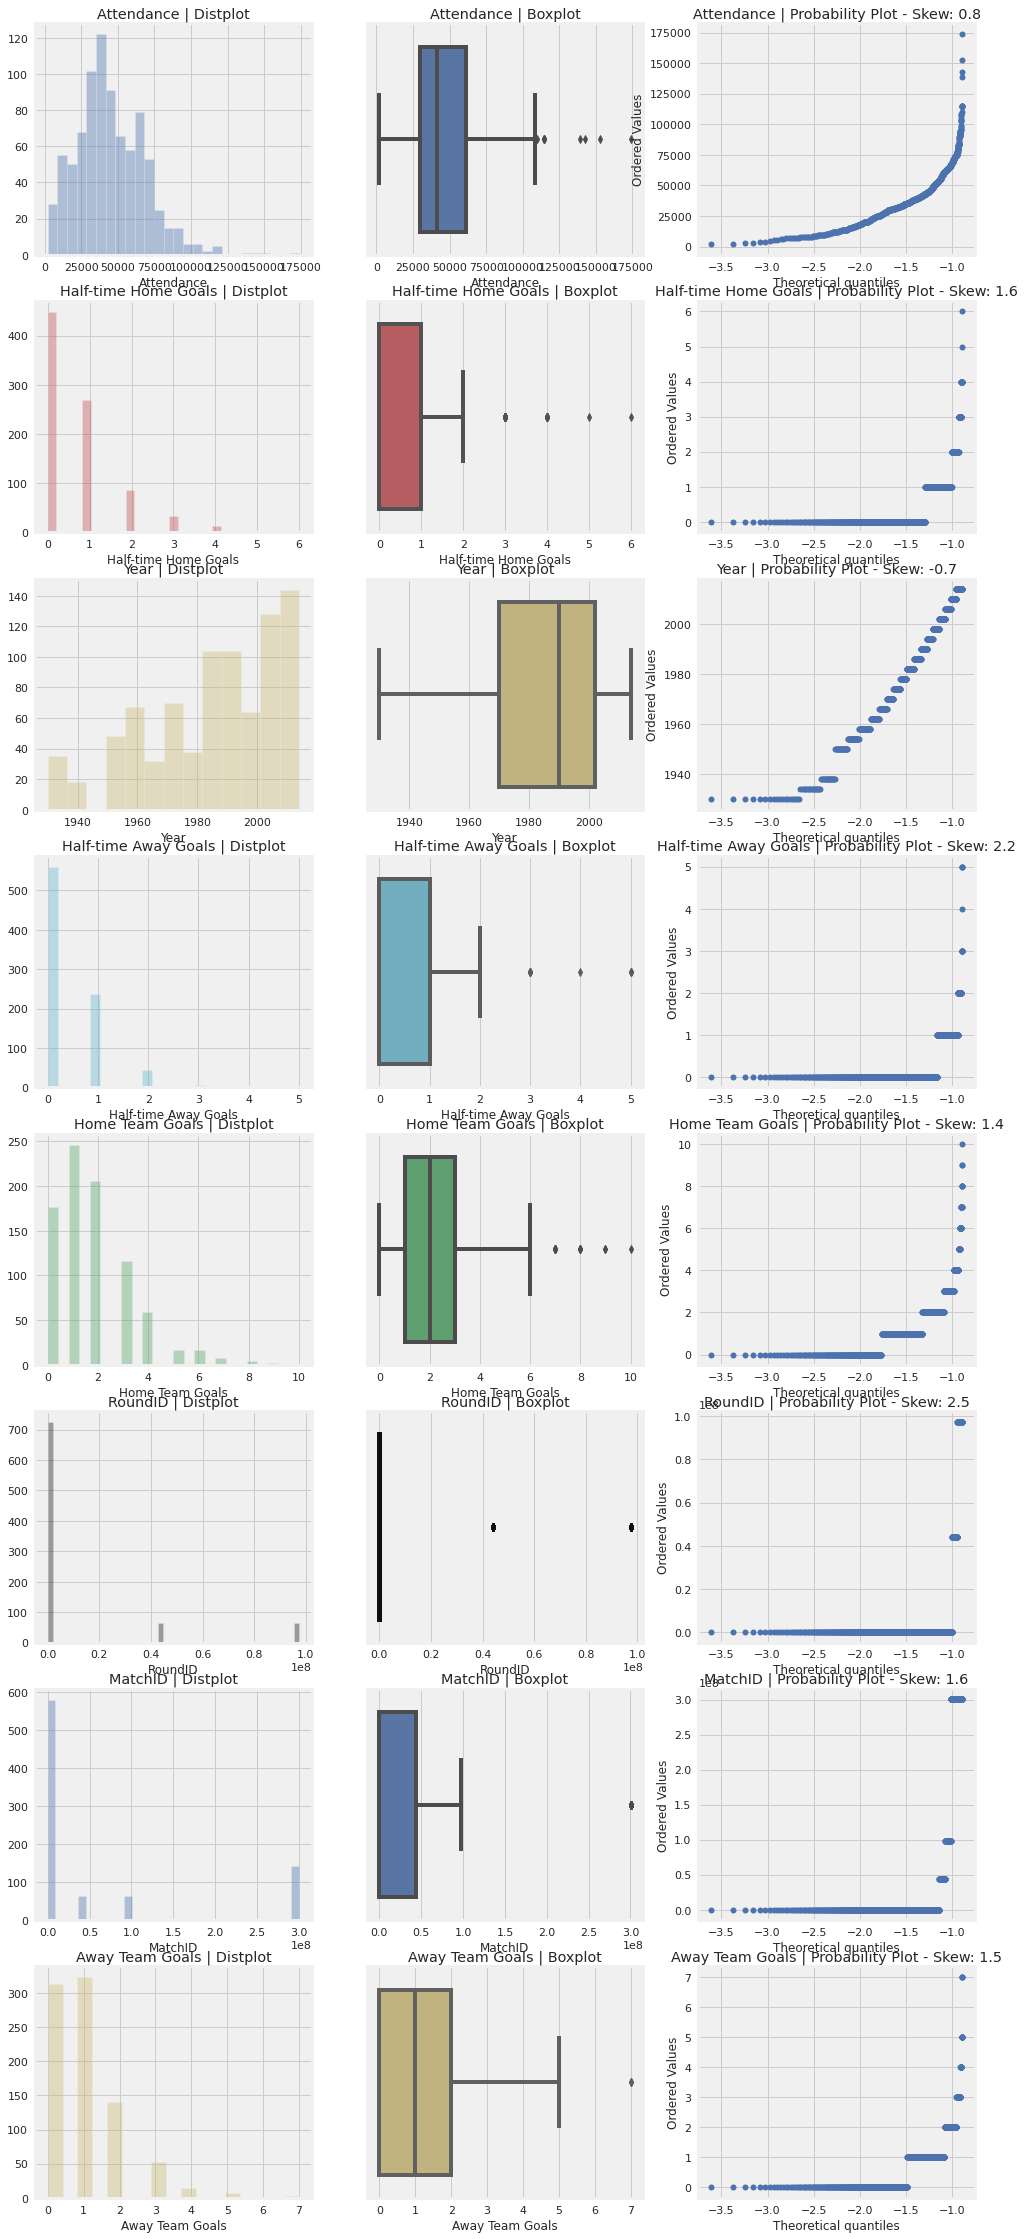

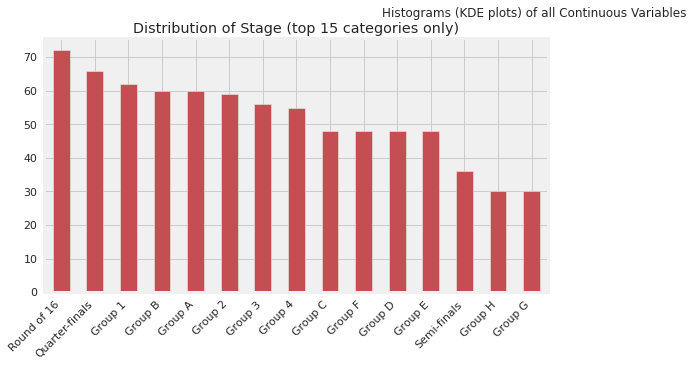

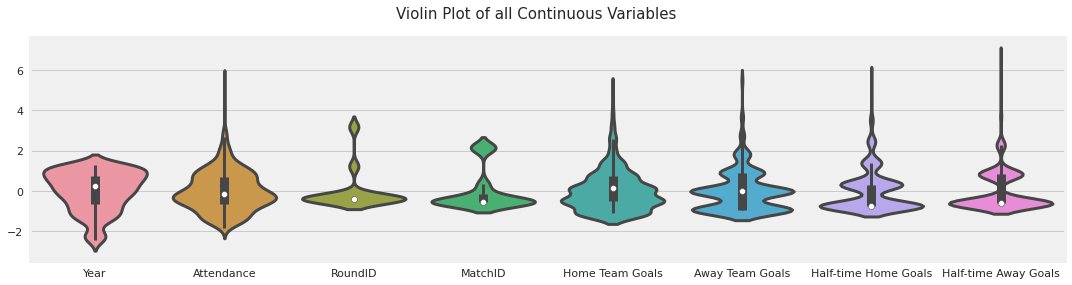

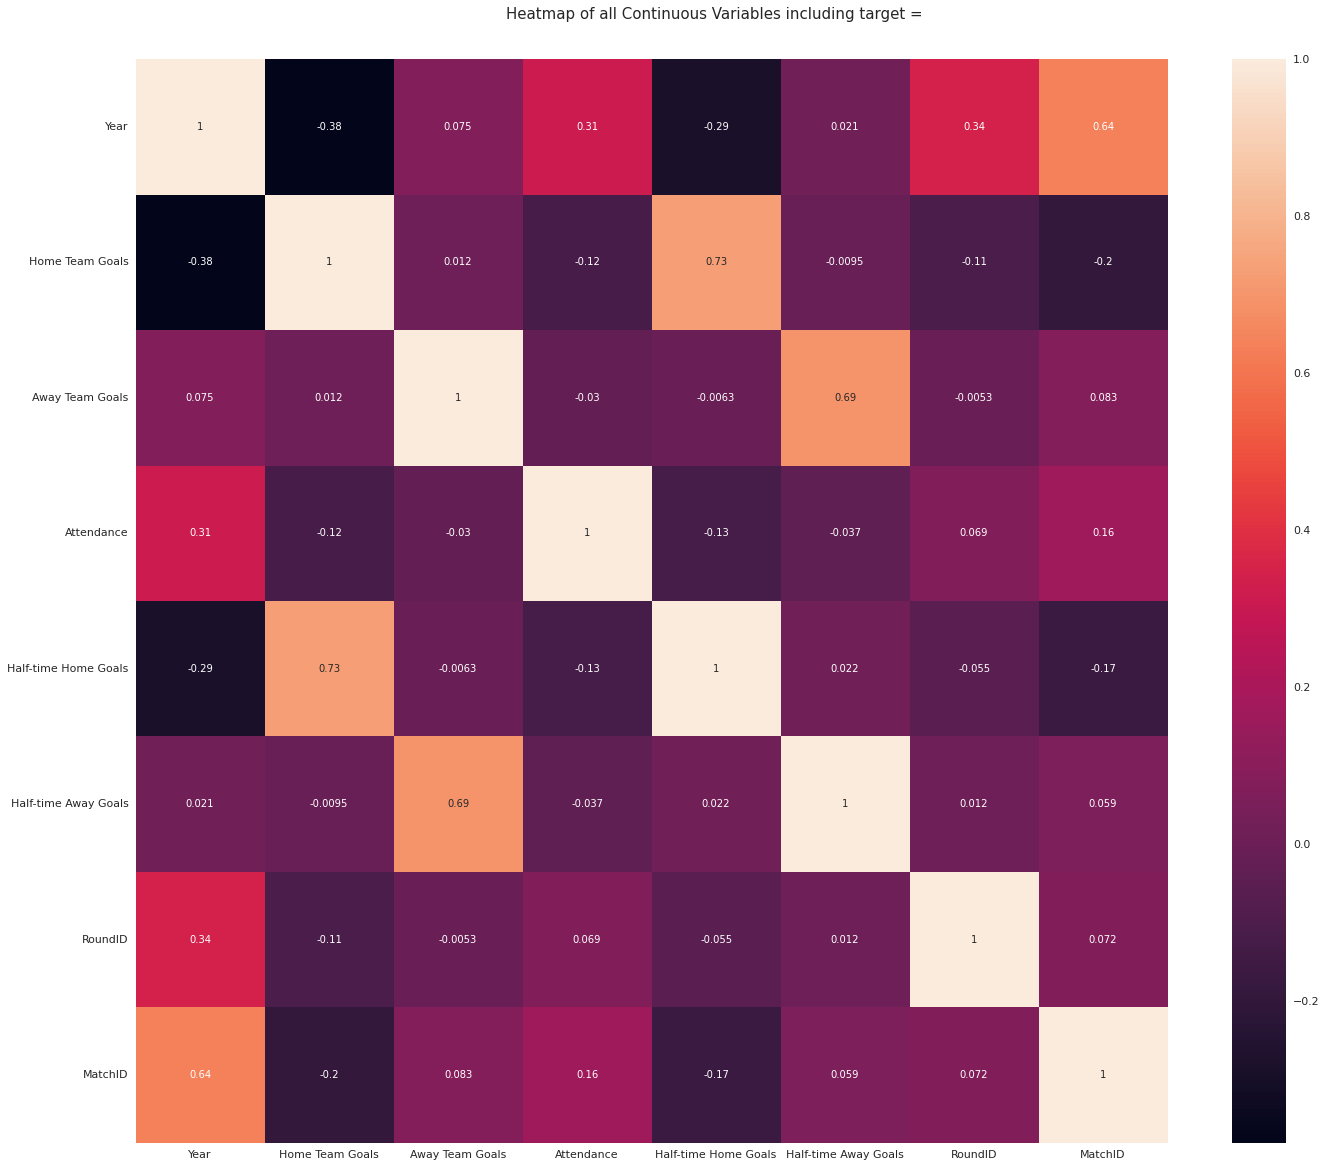

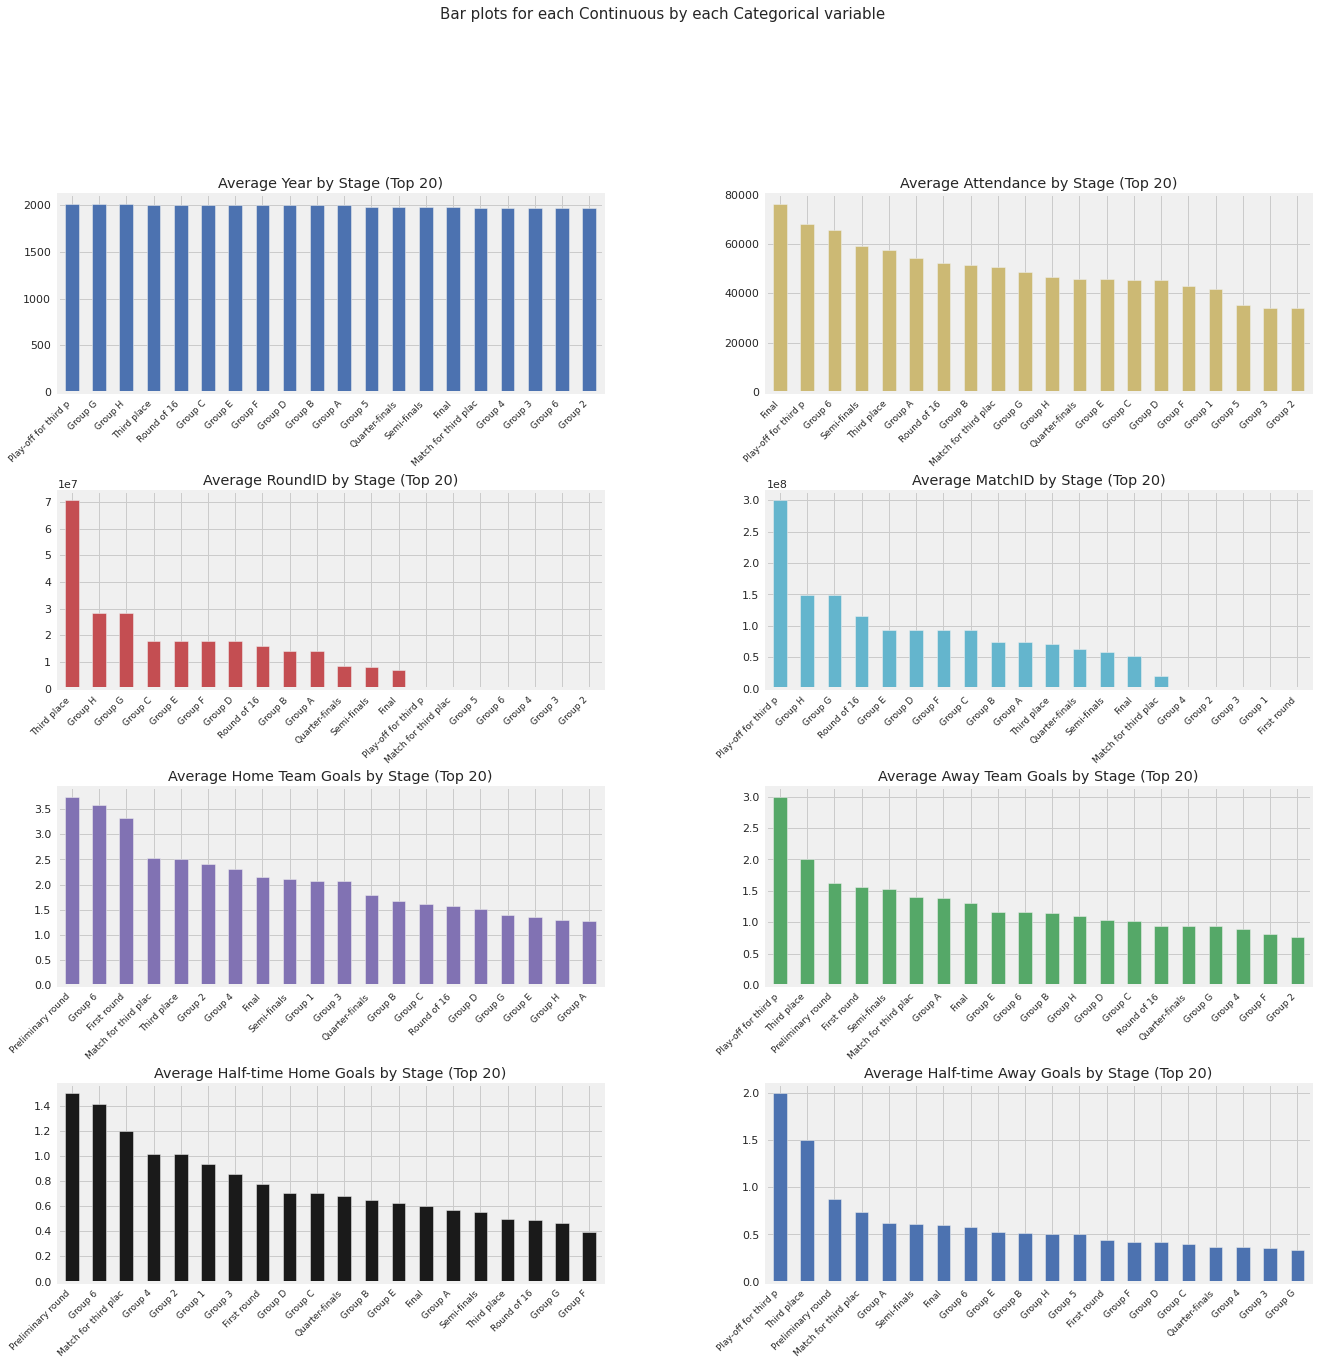

Could not draw wordcloud plot for Datetime
Could not draw wordcloud plot for Stadium
Could not draw wordcloud plot for City
Could not draw wordcloud plot for Home Team Name
Could not draw wordcloud plot for Away Team Name
Could not draw wordcloud plot for Win conditions
Could not draw wordcloud plot for Referee
Could not draw wordcloud plot for Assistant 1
Could not draw wordcloud plot for Assistant 2
Could not draw wordcloud plot for Home Team Initials
Could not draw wordcloud plot for Away Team Initials
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
dft = AV.AutoViz(
         filename="",
         sep=",",
         depVar="",
         dfte=df_part2,
         header=0,
         verbose=0,
         lowess=False,
         chart_format="svg",
         max_rows_analyzed=150000,
         max_cols_analyzed=30,
         )

### Word Cloud visualization
 
Let's perform a word cloud visualization that matplotlib offers:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

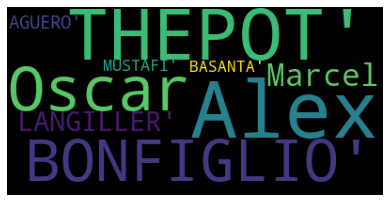

In [ ]:
text = df_jug['Player Name'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()